In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np


In [5]:
x = torch.randn(2,2,1)
x

tensor([[[ 1.4360],
         [-0.7208]],

        [[ 1.5780],
         [-1.0988]]])

In [6]:
x.ndim

3

In [7]:
x.shape

torch.Size([2, 2, 1])

In [9]:
x.dtype

torch.float32

In [10]:
x = torch.tensor([1,2,3])
x @ x

tensor(14)

In [12]:
(x @ x).dtype

torch.int64

In [13]:
x.device

device(type='cpu')

In [14]:
x.cpu()

tensor([1, 2, 3])

In [16]:
x = torch.arange(6).reshape(2,3)
x

tensor([[0, 1, 2],
        [3, 4, 5]])

In [19]:
x.type(torch.float64).mean()


tensor(2.5000, dtype=torch.float64)

In [22]:
torch.argmin(x)

tensor(0)

In [23]:
x_num = np.arange(1,6)
x_tens = torch.from_numpy(x_num)
print("numpy array: ", x_num)
print("torch tensor: ", x_tens)

numpy array:  [1 2 3 4 5]
torch tensor:  tensor([1, 2, 3, 4, 5])


In [26]:
random_seed = 1
torch.manual_seed(random_seed)
tens_A = torch.randn(2,3)
torch.manual_seed(random_seed)
tens_B = torch.randn(2,3)
print("Tensor A: ", tens_A)
print("Tensor B: ", tens_B)
print(tens_A == tens_B)

Tensor A:  tensor([[ 0.6614,  0.2669,  0.0617],
        [ 0.6213, -0.4519, -0.1661]])
Tensor B:  tensor([[ 0.6614,  0.2669,  0.0617],
        [ 0.6213, -0.4519, -0.1661]])
tensor([[True, True, True],
        [True, True, True]])


In [29]:
# Runnnig tensors on GPU
torch.cuda.is_available()

True

In [35]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [36]:
torch.cuda.device_count()

1

In [37]:
x

tensor([[0, 1, 2],
        [3, 4, 5]])

In [39]:
y = x.to(device)
y.device

device(type='cuda', index=0)

In [41]:
nvidia-smi

NameError: name 'nvidia' is not defined

In [44]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data.ndim

2

In [50]:
tens = torch.tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tens.add(5)

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])

In [51]:
tens

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [52]:
tens.add_(5)
tens

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])

In [58]:
n = np.ones(5)
t = torch.from_numpy(n)
n = n + 1
print("numpy array: ", n)
print("torch tensor: ", t)

numpy array:  [2. 2. 2. 2. 2.]
torch tensor:  tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [59]:
np.add(n, 1, out=n)
print("numpy array: ", n)
print("torch tensor: ", t)

numpy array:  [3. 3. 3. 3. 3.]
torch tensor:  tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [61]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights = ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/uas-laptop/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 28.2MB/s]


In [66]:
prediction = model(data) # forward pass
prediction.shape

torch.Size([1, 1000])

In [63]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

In [64]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [65]:
optim.step() #gradient descent

## Working of autograd

In [81]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [82]:
Q = 3*a**3 - b**2


In [84]:
external_grad = torch.tensor([1., 1.])
# Q.backward(gradient=external_grad)
Q
L = Q**2
L.backward(gradient=external_grad)

In [77]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [85]:
Q.grad

/tmp/ipykernel_13186/3805383859.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  Q.grad


In [86]:
model = resnet18(weights = ResNet18_Weights.DEFAULT)
# freezing the network
for param in model.parameters():
    param.requires_grad = False

In [87]:
model.fc = nn.Linear(512, 10)

In [89]:
from torch import optim
optimizer = optim.SGD(model.fc.parameters(), lr=1e-2, momentum=0.9)

In [95]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6,16,5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16*5*5, 120) # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # Max pooling over a (2,2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        # if the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
        
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [96]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [97]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0553,  0.0338, -0.0642,  0.1341, -0.0072, -0.1028, -0.0692,  0.0271,
         -0.1108,  0.0813]], grad_fn=<AddmmBackward0>)


In [98]:
net.zero_grad()
out.backward(torch.randn(1,10)) 

## Loss Function

In [99]:
target = torch.randn(10) # a dummy target, for example
target = target.view(1, -1) # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(out, target)
print(loss)

tensor(0.3242, grad_fn=<MseLossBackward0>)


In [104]:
print(loss.grad_fn) # MSELoss
print(loss.grad_fn.next_functions[0][0]) # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # ReLu

## Backprop

In [107]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [108]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in the training loop
optimizer.zero_grad() # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward() # backpropagation begins
optimizer.step() # update weights

## Training a Classifier

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms

In [10]:
# The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


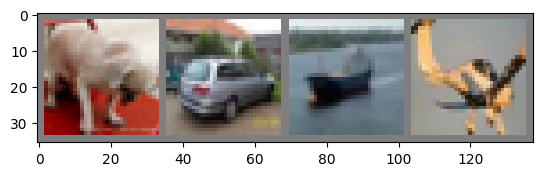

dog  car  ship plane


In [11]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print("".join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 3 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16*5*5, 120) # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # Max pooling over a (2,2) window
        x = self.pool(F.relu(self.conv1(x)))
        # if the size is a square you can only specify a single number
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
        
net = Net()

# Loss Function

In [13]:
import torch.optim  as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = .001, momentum=0.9)

In [14]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
            
print('Finished Training')

/home/uas-laptop/anaconda3/envs/tutorial_deep/lib/python3.8/site-packages/torch/autograd/__init__.py:251: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


[1,  2000] loss: 2.222
[1,  4000] loss: 1.946
[1,  6000] loss: 1.742
[1,  8000] loss: 1.643
[1, 10000] loss: 1.533
[1, 12000] loss: 1.486
[2,  2000] loss: 1.389
[2,  4000] loss: 1.374
[2,  6000] loss: 1.362
[2,  8000] loss: 1.285
[2, 10000] loss: 1.276
[2, 12000] loss: 1.275
Finished Training


In [15]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

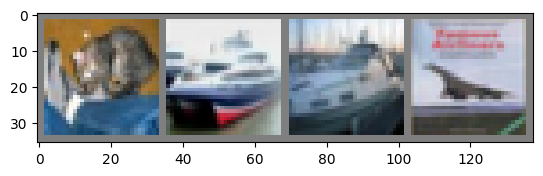

Ground Truth:  cat  ship ship plane


In [16]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print("Ground Truth: ", "".join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [17]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [18]:
outputs = net(images)
print(outputs)

tensor([[-1.4039, -1.6055,  1.1552,  2.3453, -1.5131,  1.5248,  1.9049, -1.1273,
         -0.5297, -0.9233],
        [ 3.5660,  4.9118, -1.2170, -1.3451, -2.8561, -3.1288, -3.9619, -3.6823,
          4.6271,  3.2783],
        [ 1.7214,  0.6397,  0.8311, -0.1673, -0.9685, -1.1392, -2.1188, -1.0927,
          1.6286,  0.1769],
        [ 2.7182, -0.7463,  1.5304, -0.3614, -0.0927, -1.4114, -2.0089, -1.2276,
          1.9126, -0.3715]], grad_fn=<AddmmBackward0>)


In [19]:
_, predicted = torch.max(outputs, 1)
print(predicted)
print("Predicted: ", "".join(f'{classes[predicted[j]]:5s}' for j in range(batch_size)))

tensor([3, 1, 0, 0])
Predicted:  cat  car  planeplane


In [20]:
correct, total = 0, 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.3f}%')

Accuracy of the network on the 10000 test images: 55.220%


In [25]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs,1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
            
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f"Accuracy for class {classname:5s} is: {accuracy:.1f}%")

Accuracy for class plane is: 55.8%
Accuracy for class car   is: 50.8%
Accuracy for class bird  is: 45.3%
Accuracy for class cat   is: 34.4%
Accuracy for class deer  is: 36.5%
Accuracy for class dog   is: 57.9%
Accuracy for class frog  is: 69.7%
Accuracy for class horse is: 62.9%
Accuracy for class ship  is: 75.3%
Accuracy for class truck is: 63.6%


In [22]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cpu


In [23]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [24]:
inputs, labels = data[0].to(device), data[1].to(device)